In [11]:
import pandas as pd
test = pd.read_csv("C:/Users/rapha/Downloads/Test_Video.csv")
test

,Frame,Object.ID,Position.X,Position.Y,Position.Z,Velocity.X,Velocity.Y,Velocity.Z
0,0,0,-0.774495,0.459152,7.407887,0.621461,0.008339,0.036620
1,0,1,9.965694,0.337984,34.138920,1.324552,-0.002959,0.015526
2,1,0,-0.777808,0.459098,7.407397,-0.291766,-0.023265,-0.090595
3,1,1,9.949901,0.337670,34.183620,-0.664205,-0.040792,1.760696
4,2,0,-0.780856,0.459064,7.405584,-0.196293,-0.000661,-0.107908
...,...,...,...,...,...,...,...,...
2312,1219,0,5.072496,0.400697,16.026196,1.348085,0.035169,0.196370
2313,1219,1,14.599490,0.340324,34.005901,-0.728338,0.015807,-0.226378
2314,1220,0,5.121669,0.401226,16.026438,1.343414,0.028893,0.159801
2315,1220,1,14.576319,0.338166,34.037315,-0.771063,0.012827,-0.113275


In [12]:
import pandas as pd
import numpy as np



# Funktion zur Berechnung der Transformationsmatrix
def calculate_transformation_matrix(src_points, dst_points):
    src_points_h = np.hstack((src_points, np.ones((src_points.shape[0], 1))))
    transform_matrix, _, _, _ = np.linalg.lstsq(src_points_h, dst_points, rcond=None)
    return transform_matrix

# Funktion zum Transformieren eines Punktes
def transform_point(P, matrix):
    P_hom = np.append(P, 1)
    return np.dot(P_hom, matrix)

# Transformationsmatrix berechnen (wie in deinem Beispiel)
src_points = np.array([
    [-1.000, 0.437230, 8.140144],    # P1 3D (unten Mitte der Grundlinie)
    [1.8500, 0.1372785, 18.577],     # P2 3D (links Mitte der Seitenlinie)
    [9.86, 0.449, 17.39248]          # P3 3D (rechts Mitte der Seitenlinie)
])
dst_points = np.array([
    [0, -11.885],    # P1 2D (unten Mitte der Grundlinie)
    [-4.115, 0],     # P2 2D (links Mitte der Seitenlinie)
    [4.115, 0]       # P3 2D (rechts Mitte der Seitenlinie)
])

transformation_matrix = calculate_transformation_matrix(src_points, dst_points)

# Transformation auf jeden Punkt im DataFrame anwenden
def apply_transformation(row):
    point_3d = np.array([row['Position.X'], row['Position.Y'], row['Position.Z']])
    transformed_point = transform_point(point_3d, transformation_matrix)
    return pd.Series({'Transformed.X': transformed_point[0], 'Transformed.Y': transformed_point[1]})

# Transformation auf das gesamte DataFrame anwenden
test[['Transformed.X', 'Transformed.Y']] = test.apply(apply_transformation, axis=1)


# Berechnung der Geschwindigkeit aus den Geschwindigkeitskomponenten
test['Speed'] = (test['Velocity.X']**2 + test['Velocity.Y']**2 + test['Velocity.Z']**2)**0.5
test = test.drop(['Position.X', 'Position.Y', 'Position.Z', 'Velocity.X', 'Velocity.Y', 'Velocity.Z'], axis=1)


# Ergebnis anzeigen
print(test)
 


      Frame  Object.ID  Transformed.X  Transformed.Y     Speed
0         0          0       0.644607     -12.516889  0.622595
1         0          1      -5.070609      13.151519  1.324646
2         1          0       0.641954     -12.518344  0.306392
3         1          1      -5.108528      13.178837  1.882255
4         2          0       0.640287     -12.520809  0.223999
...     ...        ...            ...            ...       ...
2312   1219          0       0.722477      -2.866096  1.362766
2313   1219          1      -1.145446      15.328195  0.762872
2314   1220          0       0.764782      -2.846866  1.353194
2315   1220          1      -1.188006      15.360797  0.779444
2316   1221          0       0.807865      -2.823953  1.408590

[2317 rows x 5 columns]


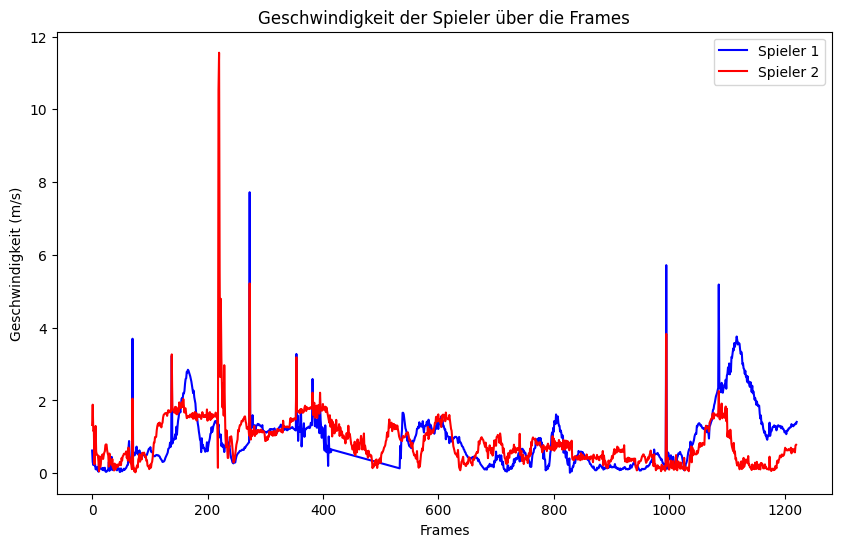

In [20]:
import matplotlib.pyplot as plt

# Erstellen einer neuen Grafik
plt.figure(figsize=(10, 6))

# Daten für den ersten Spieler (blau)
player1 = test[test['Object.ID'] == 0]  # Spieler mit Object.ID == 1
plt.plot(player1['Frame'], player1['Speed'], color='blue', label='Spieler 1')

# Daten für den zweiten Spieler (rot)
player2 = test[test['Object.ID'] == 1]  # Spieler mit Object.ID == 2
plt.plot(player2['Frame'], player2['Speed'], color='red', label='Spieler 2')

# Achsenbeschriftungen und Titel
plt.xlabel('Frames')
plt.ylabel('Geschwindigkeit (m/s)')
plt.title('Geschwindigkeit der Spieler über die Frames')

# Legende hinzufügen
plt.legend()

# Grafik anzeigen
plt.show()


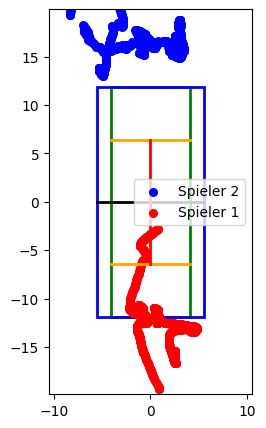

In [49]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Tennisfeldabmessungen (in Metern)
length = 23.77  # Länge des Tennisfelds
width = 8.23    # Breite des Tennisfelds für Einzel
double_width = 10.97  # Breite des Tennisfelds für Doppel
service_line_dist = 6.40  # Abstand der Aufschlaglinie vom Netz
net_position = 0  # Das Netz ist in der Mitte (Y = 0)

# Zusätzlicher Platz um das Feld (3 Meter)
extra_space = 0

# Erstellen der Grafik
fig, ax = plt.subplots(figsize=(10, 5))

# Tennisfeld (Grundlinien und Seitenlinien für Einzel)
ax.add_patch(patches.Rectangle((-width / 2 - extra_space, -length / 2 - extra_space),
                                width + 2 * extra_space, length + 2 * extra_space,
                                fill=False, edgecolor="green", lw=2))

# Seitenlinien für Doppel (außerhalb des Einzelfelds)
ax.add_patch(patches.Rectangle((-double_width / 2 - extra_space, -length / 2 - extra_space),
                                double_width + 2 * extra_space, length + 2 * extra_space,
                                fill=False, edgecolor="blue", lw=2))

# Netz
plt.plot([-double_width / 2 - extra_space, double_width / 2 + extra_space],
         [net_position, net_position], color='black', lw=2)

# Aufschlaglinien
plt.plot([-width / 2 - extra_space, width / 2 + extra_space],
         [service_line_dist, service_line_dist], color='orange', lw=2)
plt.plot([-width / 2 - extra_space, width / 2 + extra_space],
         [-service_line_dist, -service_line_dist], color='orange', lw=2)

# Mittellinie
plt.plot([0, 0], [-service_line_dist, service_line_dist], color='red', lw=2)

# Positionen von Spieler 2 einzeichnen
player2_positions = test[test['Object.ID'] == 1].head(2300)  # Erste 100 Punkte von Spieler 2

# Punkte plotten (X und Y korrekt)
plt.scatter(player2_positions['Transformed.X'], player2_positions['Transformed.Y'], color='blue', label='Spieler 2', s=30)


player1_positions = test[test['Object.ID'] == 0].head(2300)  # Erste 100 Punkte von Spieler 2

# Punkte plotten (X und Y korrekt)
plt.scatter(player1_positions['Transformed.X'], player1_positions['Transformed.Y'], color='red', label='Spieler 1', s=30)

# Achsenanpassungen
ax.set_xlim(-double_width / 2 - extra_space - 5, double_width / 2 + extra_space + 5)  # x-Achse erweitern
ax.set_ylim(-length / 2 - extra_space - 8, length / 2 + extra_space + 8)  # y-Achse erweitern
ax.set_aspect('equal')

# Achsen ausschalten und Legende hinzufügen
plt.axis()  # Achsen anzeigen
plt.legend()
plt.show()





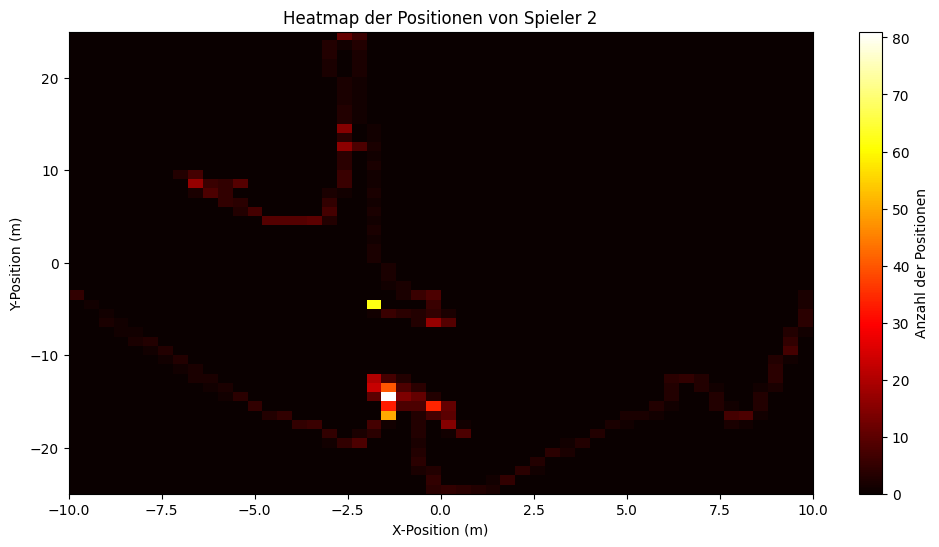

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Positionen von Spieler 2 einzeichnen
player2_positions = test[test['Object.ID'] == 0].head(2000)  # Erste 2000 Punkte von Spieler 2

# Erstellen einer Heatmap
heatmap, xedges, yedges = np.histogram2d(player2_positions['Transformed.Y'], player2_positions['Transformed.X'], bins=50)  # Mehr Bins für genauere Darstellung

# Erstellen der Grafik
plt.figure(figsize=(12, 6))

# Erzeugen einer Heatmap
plt.imshow(heatmap.T, extent=[-10, 10, -25, 25],  # Setze die Grenzen des Koordinatensystems hier
           origin='lower', cmap='hot', aspect='auto')  # 'hot' für bessere Dichteanpassung

# Achsenbeschriftungen
plt.xlabel('X-Position (m)')
plt.ylabel('Y-Position (m)')

# Titel hinzufügen
plt.title('Heatmap der Positionen von Spieler 2')

# Farbskala hinzufügen
plt.colorbar(label='Anzahl der Positionen')

# Grafik anzeigen
plt.show()


